In [21]:
# Stocks price predection
# Import modules

import yfinance as yf
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import math

In [161]:
# Import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [3]:
# Import ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Get data

In [81]:
# Dataset 1: Barclays

ticker = "BARC.L"

data1 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data1.to_csv("barclays_data.csv")

[*********************100%***********************]  1 of 1 completed


In [202]:
# Dataset 2: Shell

ticker = "SHEL.L"

shell_2005 = yf.download(ticker , start="2005-01-01", end="2015-01-01", auto_adjust=False)

shell_2005.to_csv("shell_2005.csv")

[*********************100%***********************]  1 of 1 completed


In [241]:
# Dataset 2: Shell

ticker = "SHEL.L"

shell_2015 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

shell_2015.to_csv("shell_2015.csv")

[*********************100%***********************]  1 of 1 completed


In [201]:
# Dataset 3: Apple

ticker = "AAPL"

apple_2005 = yf.download(ticker , start="2005-01-01", end="2015-01-01", auto_adjust=False)

apple_2005.to_csv("apple_2005.csv")

[*********************100%***********************]  1 of 1 completed


In [200]:
# Dataset 3: Apple

ticker = "AAPL"

apple_2015 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

apple_2015.to_csv("apple_2015.csv")

[*********************100%***********************]  1 of 1 completed


In [7]:
# Dataset 4: Rightmove

ticker = "RMV.L"

data4 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data4.to_csv("rightmove_data.csv")

[*********************100%***********************]  1 of 1 completed


In [32]:
# Dataset 5: Experian

ticker = "EXPN.L"

data5 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data5.to_csv("experian_data.csv")

[*********************100%***********************]  1 of 1 completed


In [31]:
# Dataset 6: HSBC

ticker = "HSBA.L"

data6 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data6.to_csv("hsbc_data.csv")

[*********************100%***********************]  1 of 1 completed


In [190]:
# Dataset 7: Lloyds

ticker = "LLOY.L"

data7 = yf.download(ticker, start="2015-01-01", end="2025-01-01", auto_adjust=False)

data7.to_csv("lloyds.csv")

[*********************100%***********************]  1 of 1 completed


In [191]:
# Dataset 8: JPmorgan

ticker = "JPM"

data8 = yf.download(ticker, start="2015-01-01", end="2025-01-01", auto_adjust=False)

data8.to_csv("JPM.csv")

[*********************100%***********************]  1 of 1 completed


In [192]:
# Dataset 9: JPmorgan

ticker = "BAC"

data9 = yf.download(ticker, start="2015-01-01", end="2025-01-01", auto_adjust=False)

data9.to_csv("BAC.csv")

[*********************100%***********************]  1 of 1 completed


### Preprocessing

In [141]:
data1 = pd.read_csv("barclays_data.csv", header=[0,1,2])

In [142]:
data1.shape

(2526, 7)

In [143]:
data1.isnull().sum()

Price      Ticker  Date                  0
Adj Close  BARC.L  Unnamed: 1_level_2    0
Close      BARC.L  Unnamed: 2_level_2    0
High       BARC.L  Unnamed: 3_level_2    0
Low        BARC.L  Unnamed: 4_level_2    0
Open       BARC.L  Unnamed: 5_level_2    0
Volume     BARC.L  Unnamed: 6_level_2    0
dtype: int64

In [144]:
data1.columns = data1.columns.droplevel([1,2])
data1 = data1.rename(columns={'Price': 'Date'})
data1['Date'] = pd.to_datetime(data1['Date'])

In [145]:
data1.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

In [146]:
data1

,Date,Adj Close
0,2015-01-02,242.415970
1,2015-01-05,233.991470
2,2015-01-06,229.654617
3,2015-01-07,229.903854
4,2015-01-08,236.334457
...,...,...
2521,2024-12-23,261.531952
2522,2024-12-24,263.481384
2523,2024-12-27,264.831085
2524,2024-12-30,264.681091


In [147]:
data1.describe

<bound method NDFrame.describe of            Date   Adj Close
0    2015-01-02  242.415970
1    2015-01-05  233.991470
2    2015-01-06  229.654617
3    2015-01-07  229.903854
4    2015-01-08  236.334457
...         ...         ...
2521 2024-12-23  261.531952
2522 2024-12-24  263.481384
2523 2024-12-27  264.831085
2524 2024-12-30  264.681091
2525 2024-12-31  268.080231

[2526 rows x 2 columns]>

In [148]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2526 non-null   datetime64[ns]
 1   Adj Close  2526 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.6 KB


Text(0, 0.5, 'Adjusted close')

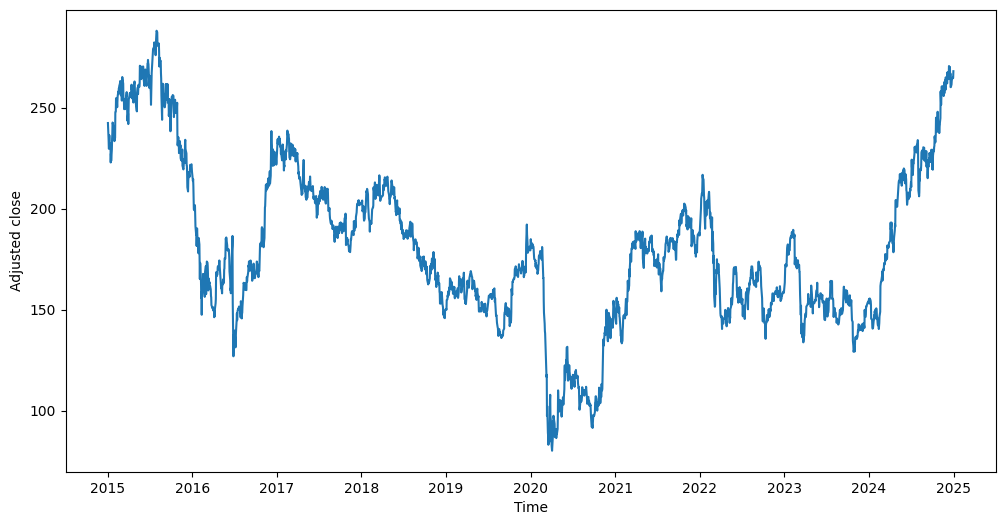

In [149]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [150]:
data_ajdc = data1[["Adj Close"]].values

In [151]:
# Train Test Split
train_size = int(len(data_ajdc) * 0.8)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

In [152]:
train_data

array([[242.41596985],
       [233.99147034],
       [229.65461731],
       ...,
       [157.55465698],
       [158.69329834],
       [159.152771  ]])

In [153]:
data1

,Date,Adj Close
0,2015-01-02,242.415970
1,2015-01-05,233.991470
2,2015-01-06,229.654617
3,2015-01-07,229.903854
4,2015-01-08,236.334457
...,...,...
2521,2024-12-23,261.531952
2522,2024-12-24,263.481384
2523,2024-12-27,264.831085
2524,2024-12-30,264.681091


In [154]:
# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [155]:
#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [156]:
time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [157]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60)
Test samples: (446, 60)


In [158]:
# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [159]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60, 1)
Test samples: (446, 60, 1)


# Model: LSTM (Barclays)

In [165]:
# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [166]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1680 - val_loss: 0.0204
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0442 - val_loss: 0.0173
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0414 - val_loss: 0.0162
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0373 - val_loss: 0.0158
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0341 - val_loss: 0.0170
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0315 - val_loss: 0.0151
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0345 - val_loss: 0.0145
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0306 - val_loss: 0.0141
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0291 - val_loss: 0.0124
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0306 - val_loss: 0.0108
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0304 - val_loss: 0.0117
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

In [117]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [118]:
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [119]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.07363198242909726

In [120]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.06806397177864182

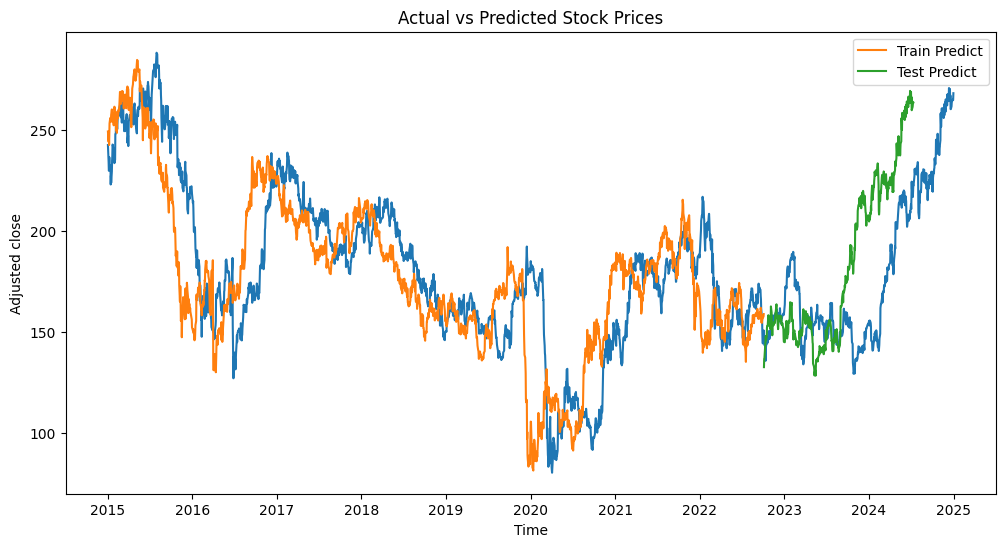

In [121]:
plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.plot(data1["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(data1["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

# Adjusting Hyperparamerter

In [172]:
model2 = Sequential([
    Input(shape=(60, 1)),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(16),
    Dropout(0.2),
    Dense(1)
])
model2.compile(loss="mse", optimizer="adam")

model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 60, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,505 (29.32 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

In [173]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model2.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[es])

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1854 - val_loss: 0.0239
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0515 - val_loss: 0.0203
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0418 - val_loss: 0.0196
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0408 - val_loss: 0.0184
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0407 - val_loss: 0.0189
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0359 - val_loss: 0.0156
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0366 - val_loss: 0.0155
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0323 - val_loss: 0.0138
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0331 - val_loss: 0.0126
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0330 - val_loss: 0.0122
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0315 - val_loss: 0.0163
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

In [174]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0.1142154479524659
0.09830281252697505


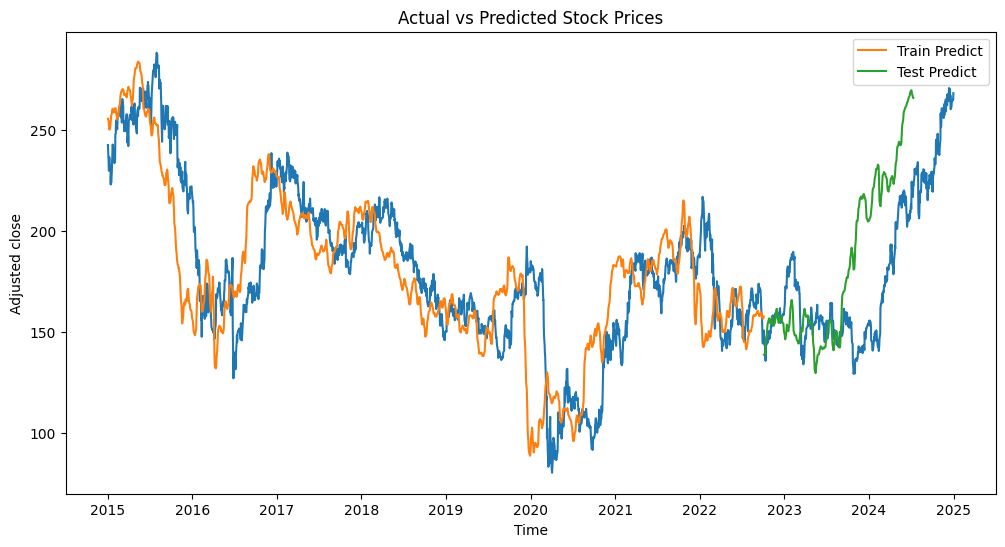

In [175]:
plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.plot(data1["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(data1["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

# Testing on different stock dataset

In [195]:
def testin_Stocks(stock_name, file_path):
    print(f"\nProcessing: {stock_name}")
    
    # Get data
    data6 = pd.read_csv(file_path, header=[0,1,2])

    # Preprocess MultiIndex columns
    data6.columns = data6.columns.droplevel([1, 2])

    # If your CSV has 'Price' as the date column name:
    data6 = data6.rename(columns={'Price': 'Date'})
    data6['Date'] = pd.to_datetime(data6['Date'])

    # Keep only Adj Close (and Date if you want)
    data6.drop(["Close", "High", "Low", "Open", "Volume"], axis=1, inplace=True)

    # Use Adjusted Close as feature
    data_ajdc = data6[["Adj Close"]].values  # shape (N, 1)

    # Scale using pre-fitted scaler
    scaled_data = scaler.transform(data_ajdc)

    time_steps = 60

    X_new = []
    for i in range(time_steps, len(scaled_data)):
        X_new.append(scaled_data[i - time_steps:i])

    X_new = np.array(X_new)  # now convert once, after loop

    # Reshape for LSTM: (samples, timesteps, features)
    X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))

    # Predict
    predictions_scaled = model2.predict(X_new)

    # Inverse transform back to price scale
    predictions_d6 = scaler.inverse_transform(predictions_scaled)

    # True values to compare with
    true_values = data6["Adj Close"].values[time_steps:]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(true_values, label="Original Price")
    plt.plot(predictions_d6, label="Predicted Price")
    plt.title(f"Original vs Predicted Stock Price: {stock_name}")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

    return


Processing: LLoyds
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


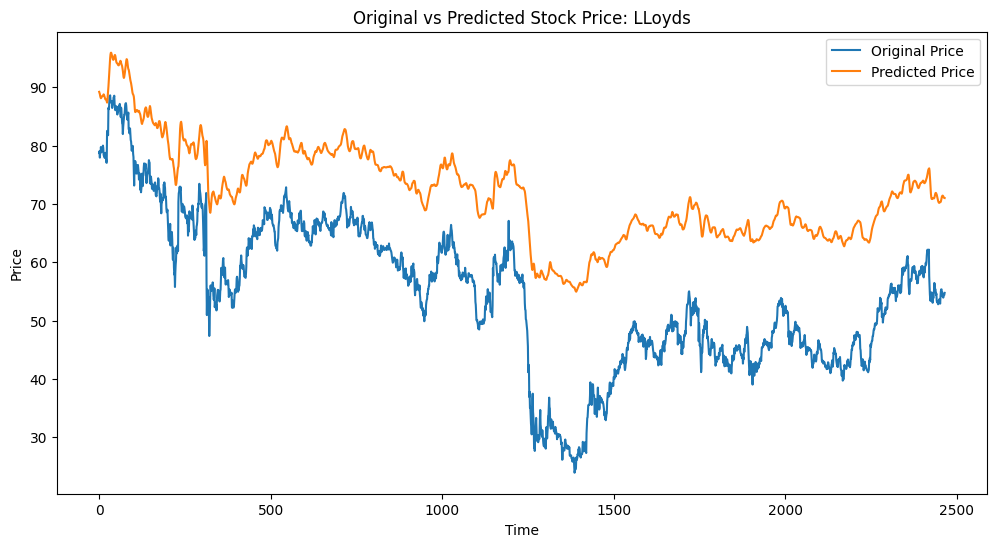


Processing: HSBC
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


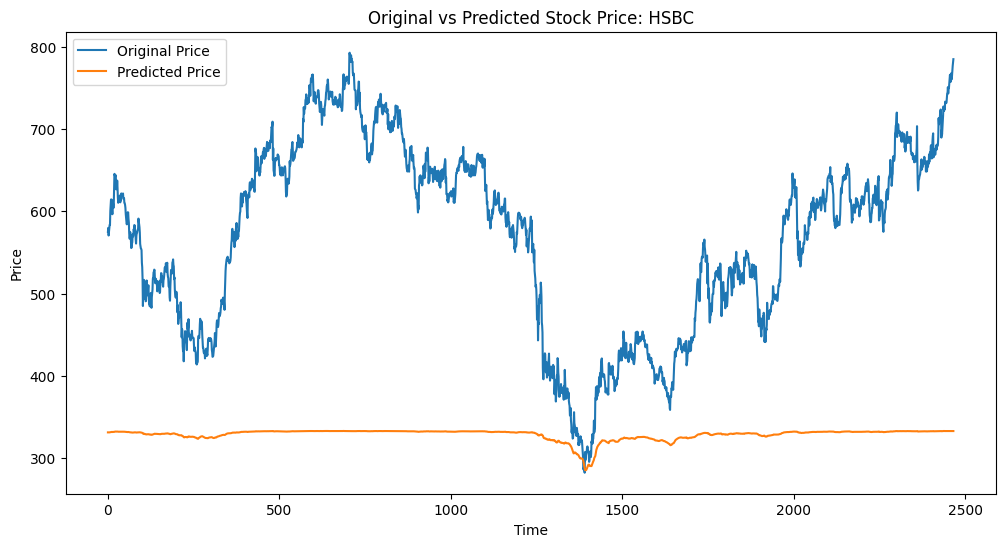


Processing: JPM
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


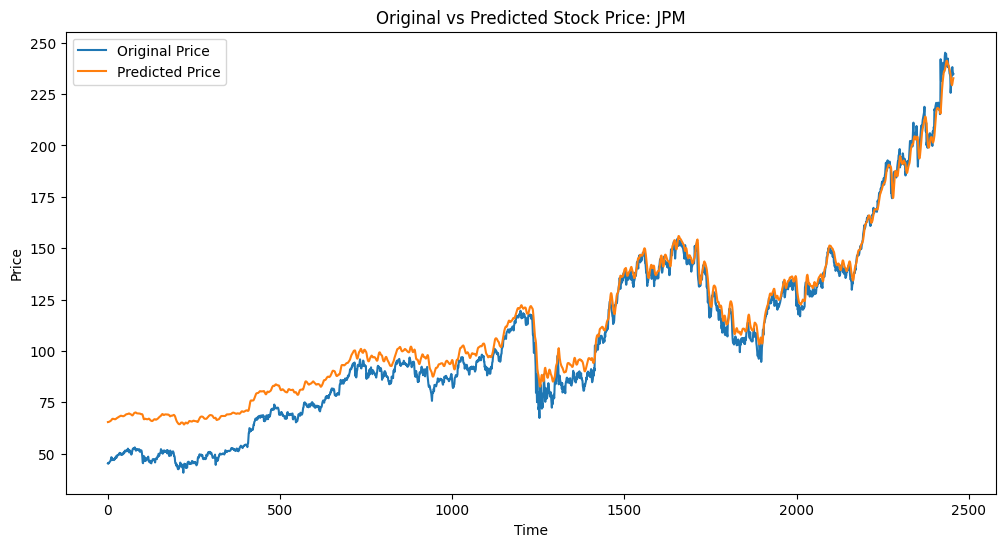


Processing: BAC
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


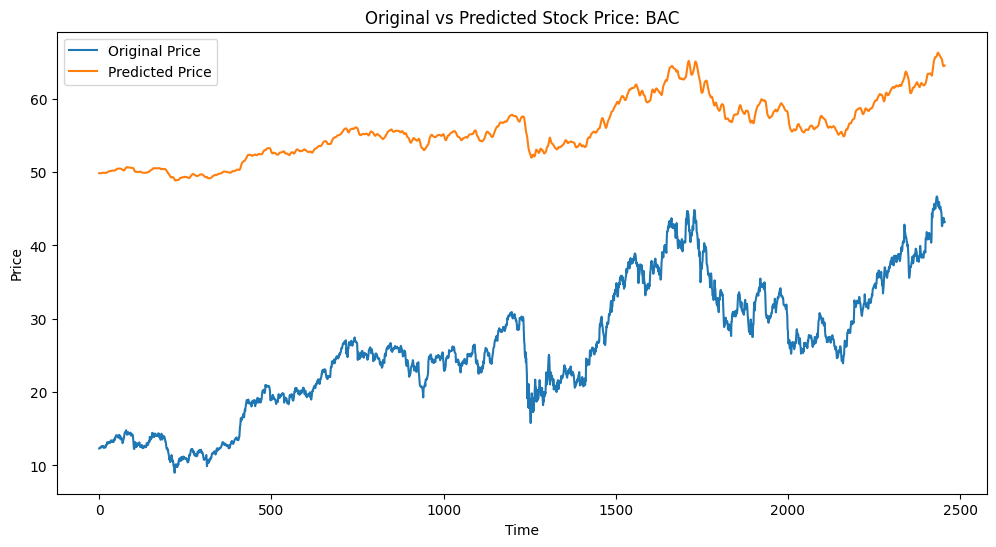

In [196]:
stocks = {
    "LLoyds": "lloyds.csv",
    "HSBC": "hsbc_data.csv",
    "JPM": "JPM.csv",
    "BAC": "BAC.csv"
}

for name, path in stocks.items():
    testin_Stocks(name, path)

# Teseting on ARIMA

In [630]:
# Dataset 2: Shell

data2 = pd.read_csv("shell_data.csv", header=[0,1,2])

In [631]:
data2

,Price,Adj Close,Close,High,Low,Open,Volume
,Ticker,SHEL.L,SHEL.L,SHEL.L,SHEL.L,SHEL.L,SHEL.L
,Date,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2,Unnamed: 6_level_2
0,2015-01-02,2155.649902,2168.0,2176.500000,2125.0,2173.5,3251273
1,2015-01-05,2068.151855,2080.0,2161.000000,2076.0,2157.5,8741887
2,2015-01-06,2067.654541,2079.5,2123.500000,2033.0,2080.0,7476529
3,2015-01-07,2086.049561,2098.0,2128.000000,2055.5,2087.5,6579382
4,2015-01-08,2130.295654,2142.5,2150.500000,2112.0,2134.5,4549799
...,...,...,...,...,...,...,...
2521,2024-12-23,2407.962646,2409.0,2410.000000,2387.0,2396.0,6564724
2522,2024-12-24,2427.953857,2429.0,2437.219971,2419.0,2419.5,3634589


In [632]:
data2.columns = data2.columns.droplevel([1,2])
data2 = data2.rename(columns={'Price': 'Date'})
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)

In [633]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2526 entries, 2015-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2526 non-null   float64
 1   Close      2526 non-null   float64
 2   High       2526 non-null   float64
 3   Low        2526 non-null   float64
 4   Open       2526 non-null   float64
 5   Volume     2526 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.1 KB


In [634]:
result = adfuller(data2['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.7105533333741068
p-value: 0.42568344880166314


In [635]:
data_diff = data2['Adj Close'].diff().dropna()

In [636]:
adfuller(data_diff)

(np.float64(-37.120024674844764),
 0.0,
 1,
 2523,
 {'1%': np.float64(-3.432944516713937),
  '5%': np.float64(-2.8626862482960957),
  '10%': np.float64(-2.567380191580307)},
 np.float64(24616.253088644124))

In [637]:
data2.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

In [638]:
data2

,Adj Close
Date,
2015-01-02,2155.649902
2015-01-05,2068.151855
2015-01-06,2067.654541
2015-01-07,2086.049561
2015-01-08,2130.295654
...,...
2024-12-23,2407.962646
2024-12-24,2427.953857
2024-12-27,2439.448975


Text(0, 0.5, 'Adjusted close')

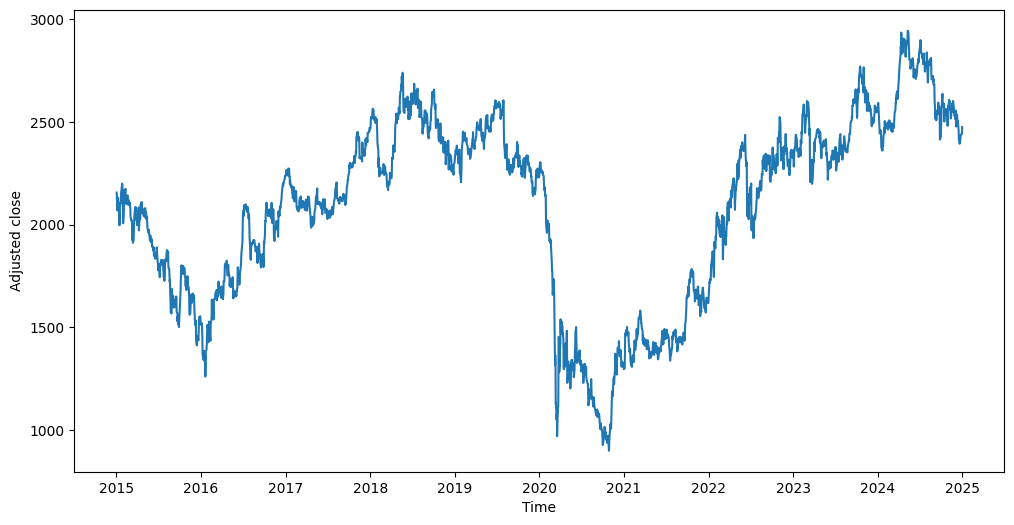

In [639]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data2.index, data2["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [640]:
data2["log"] = np.log(data2["Adj Close"])

Text(0, 0.5, 'Adjusted close')

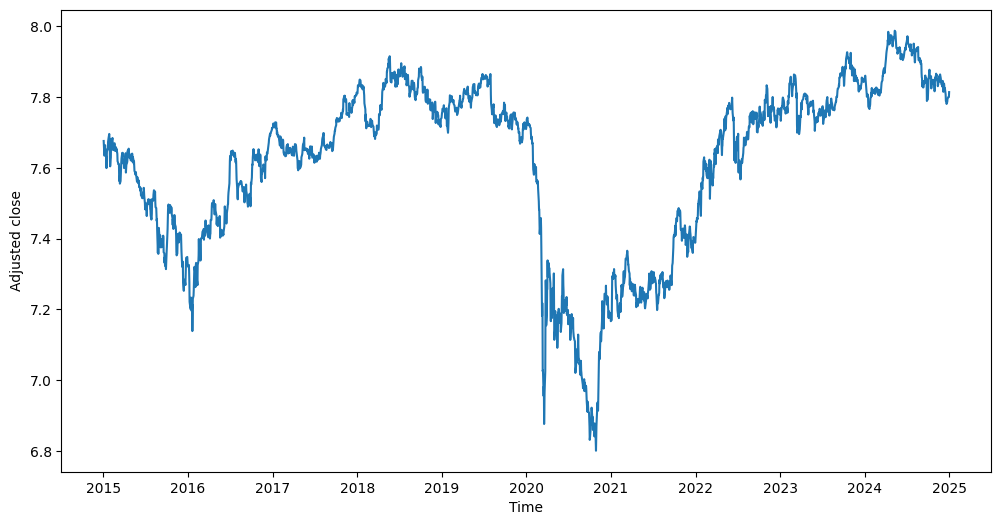

In [641]:
plt.figure(figsize = (12,6))
plt.plot(data2.index, data2["log"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [642]:
data2["diff"] = data2["Adj Close"].diff()
data2 = data2.replace([np.inf, -np.inf], np.nan).dropna(subset=["diff"])

Text(0, 0.5, 'Adjusted close')

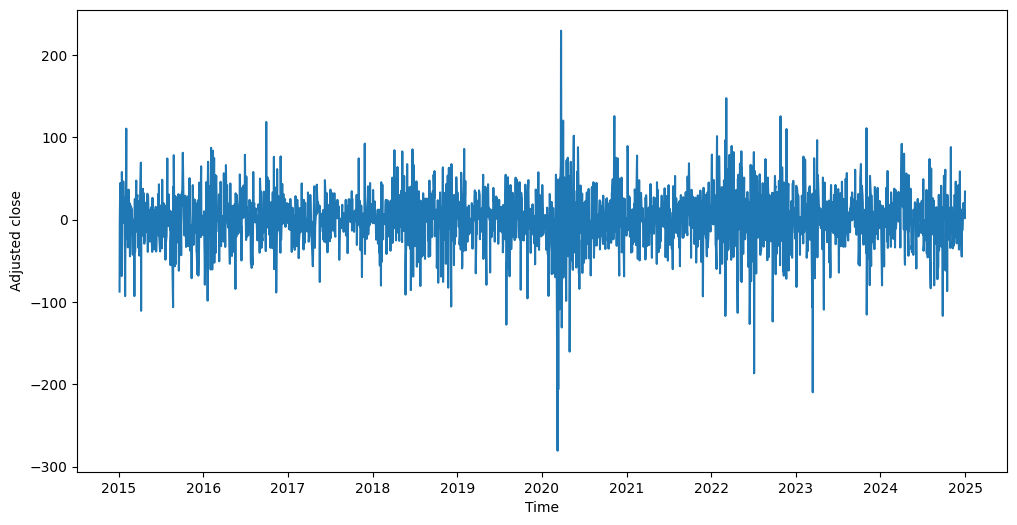

In [643]:
plt.figure(figsize = (12,6))
plt.plot(data2.index, data2["diff"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [644]:
data2

,Adj Close,log,diff
Date,,,
2015-01-05,2068.151855,7.634411,-87.498047
2015-01-06,2067.654541,7.634170,-0.497314
2015-01-07,2086.049561,7.643027,18.395020
2015-01-08,2130.295654,7.664016,44.246094
2015-01-09,2094.499756,7.647070,-35.795898
...,...,...,...
2024-12-23,2407.962646,7.786536,14.493896
2024-12-24,2427.953857,7.794804,19.991211
2024-12-27,2439.448975,7.799527,11.495117


In [645]:
#from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data2["diff"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -37.120024674844764
p-value: 0.0


In [646]:
data_ajdc = data2[["Adj Close"]]

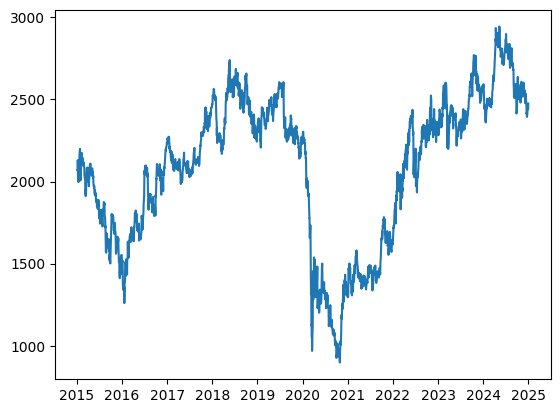

In [661]:
plt.plot(data_ajdc)

In [648]:
train_size = int(len(data_ajdc) * 0.7)
train_data = data_ajdc.iloc[:train_size]
test_data  = data_ajdc.iloc[train_size:]

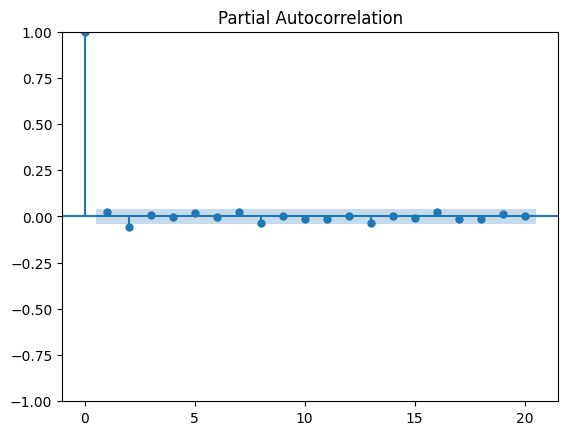

In [649]:
plot_pacf(data2["diff"], lags=20)
plt.show()

In [650]:
type(train_data)

pandas.core.frame.DataFrame

In [651]:
print(len(train_data), len(test_data))


1767 758


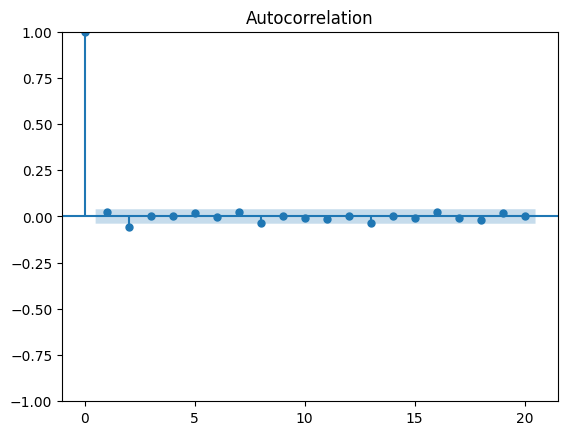

In [652]:
plot_acf(data2["diff"], lags=20)
plt.show()

In [653]:
type(train_data)

pandas.core.frame.DataFrame

In [654]:
# Set Frequency

#train_data.index.freq = 'D'

train_data = train_data.asfreq('D').interpolate()

In [655]:
train_data

,Adj Close
Date,
2015-01-05,2068.151855
2015-01-06,2067.654541
2015-01-07,2086.049561
2015-01-08,2130.295654
2015-01-09,2094.499756
...,...
2021-12-20,1571.099976
2021-12-21,1616.028564
2021-12-22,1625.413330


In [693]:
#from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 1, 1))    # hyperparameter
model_fit = model.fit()

In [694]:
train_pred = model_fit.predict(start = train_data.index[0], end = train_data.index[-1])

In [695]:
forecast_obj = model_fit.get_forecast(steps=len(test_data))
test_pred = forecast_obj.predicted_mean

In [696]:
test_pred.index = test_data.index

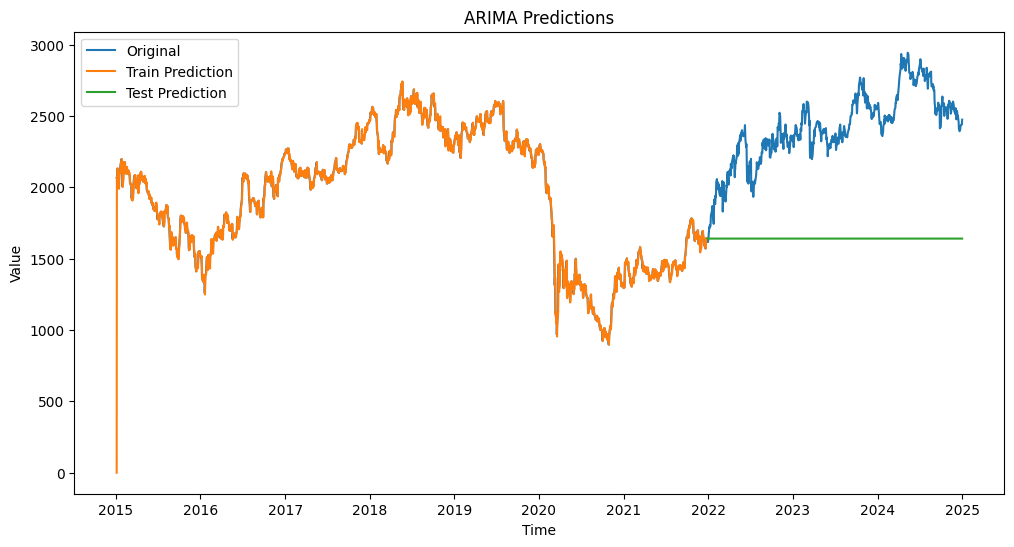

In [698]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data_ajdc, label='Original')
plt.plot(train_pred, label='Train Prediction')
plt.plot(test_data.index, test_pred, label='Test Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Predictions')
plt.show()


# Model: LSTM (Shell) INsample TEsting

### Training on 2005-2015

In [262]:
# Datasets: Shell

s05 = pd.read_csv("shell_2005.csv", header=[0,1,2]) # train

In [263]:
s05.columns = s05.columns.droplevel([1,2])
s05 = s05.rename(columns={'Price': 'Date'})
s05['Date'] = pd.to_datetime(s05['Date'])

In [264]:
s05

,Date,Adj Close,Close,High,Low,Open,Volume
0,2005-01-03,1476.867310,1492.050049,1500.890015,1492.050049,1495.619995,39200
1,2005-01-04,1468.433716,1483.530029,1486.000000,1476.119995,1478.579956,1627860
2,2005-01-05,1465.337036,1480.400024,1486.030029,1475.479980,1475.489990,1090968
3,2005-01-06,1471.918457,1487.050049,1487.050049,1477.920044,1477.890015,827548
4,2005-01-07,1470.691284,1485.810059,1492.449951,1477.430054,1480.219971,2534812
...,...,...,...,...,...,...,...
2529,2014-12-23,2181.005371,2193.500000,2204.500000,2166.500000,2177.000000,6779093
2530,2014-12-24,2190.947754,2203.500000,2212.500000,2191.000000,2197.000000,782453
2531,2014-12-29,2195.919189,2208.500000,2214.500000,2186.000000,2208.000000,3408048
2532,2014-12-30,2147.695801,2160.000000,2195.000000,2143.500000,2189.000000,4151318


In [265]:
s05.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

Text(0, 0.5, 'Adjusted close')

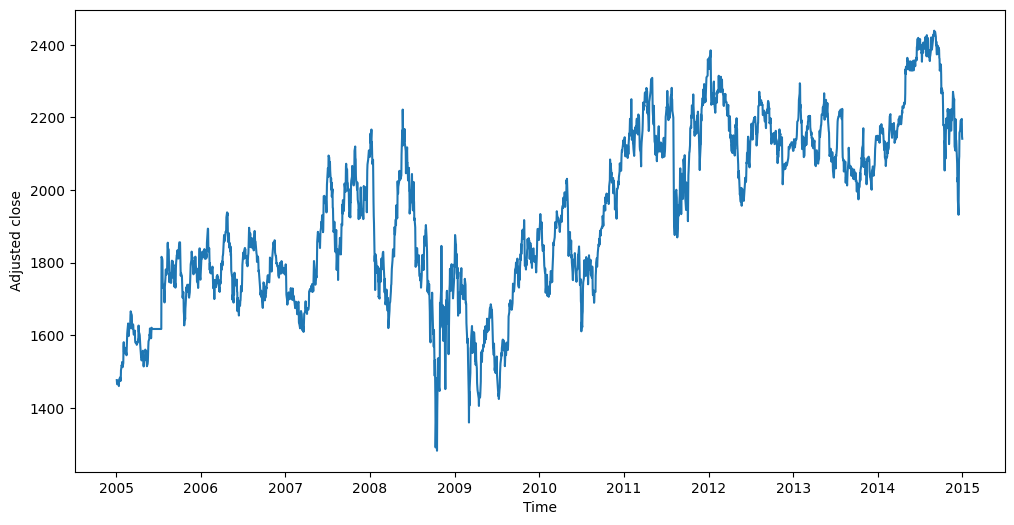

In [266]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(s05["Date"], s05["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [267]:
data_ajdc = s05[["Adj Close"]].values

In [268]:
# Train Test Split
train_size = int(len(data_ajdc) * 0.8)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

In [269]:
# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [270]:
#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [271]:
time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [272]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1967, 60)
Test samples: (447, 60)


In [273]:
# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [274]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1967, 60, 1)
Test samples: (447, 60, 1)


In [275]:
# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [276]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [277]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.1059 - val_loss: 0.0590
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0428 - val_loss: 0.0402
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0358 - val_loss: 0.0246
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0311 - val_loss: 0.0232
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0268 - val_loss: 0.0234
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0243 - val_loss: 0.0167
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0224 - val_loss: 0.0145
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0201 - val_loss: 0.0126
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0182 - val_loss: 0.0133
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0172 - val_loss: 0.0175
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0149 - val_loss: 0.0090
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step

In [278]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [279]:
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [280]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.08488630906130681

In [281]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.07262912673247968

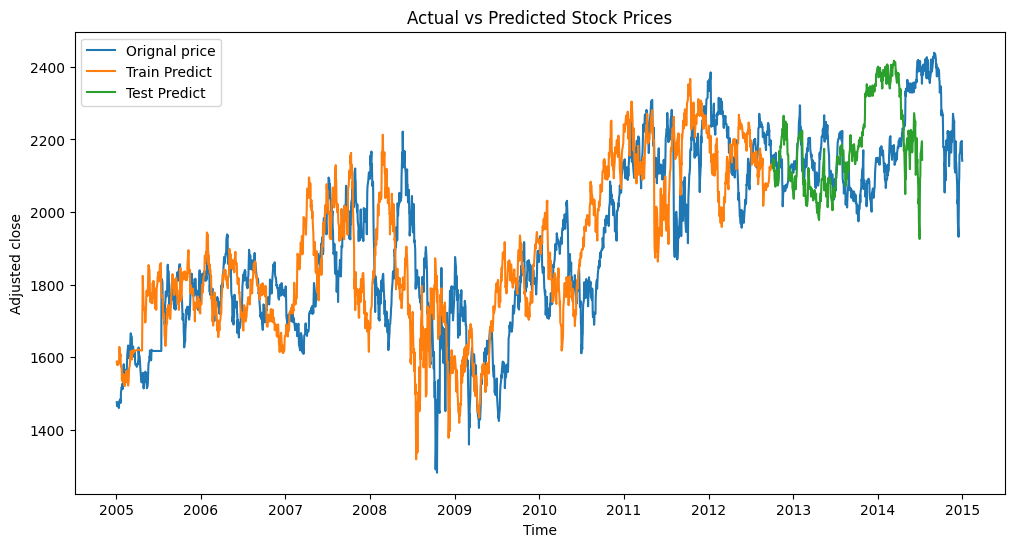

In [282]:
plt.figure(figsize = (12,6))
plt.plot(s05["Date"], s05["Adj Close"], label = "Orignal price")
plt.plot(s05["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(s05["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

### Testing on 2015-2025

In [283]:
s15 = pd.read_csv("shell_2015.csv", header=[0,1,2]) # test

In [288]:
s15

,Date,Adj Close
0,2015-01-02,2155.650879
1,2015-01-05,2068.152100
2,2015-01-06,2067.655029
3,2015-01-07,2086.049072
4,2015-01-08,2130.295654
...,...,...
2521,2024-12-23,2407.962646
2522,2024-12-24,2427.954102
2523,2024-12-27,2439.449219
2524,2024-12-30,2440.948486


In [285]:
s15.columns = s15.columns.droplevel([1,2])
s15 = s15.rename(columns={'Price': 'Date'})
s15['Date'] = pd.to_datetime(s15['Date'])

In [286]:
s15.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

In [289]:
data_ajdc = s15[["Adj Close"]].values

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


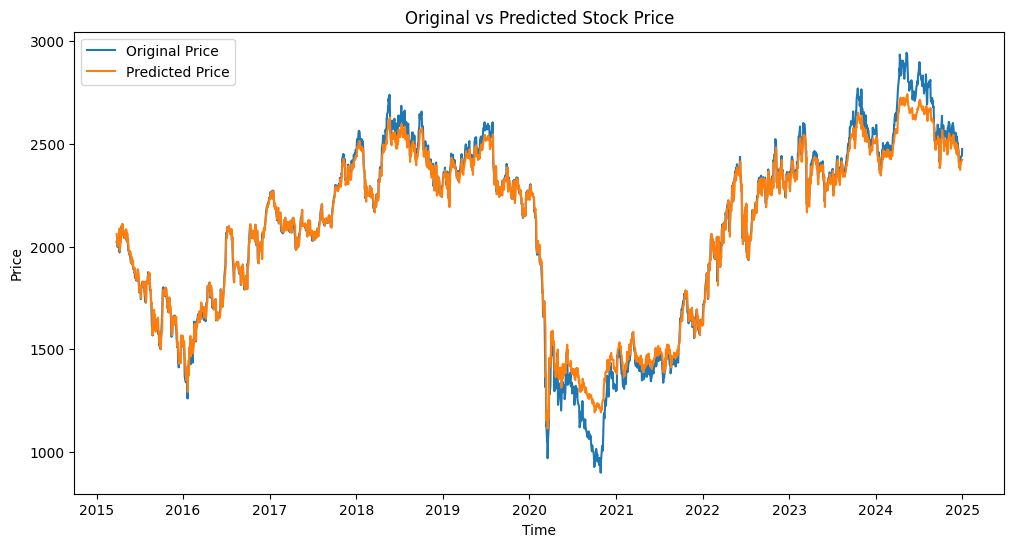

In [292]:
# Scale using pre-fitted scaler
scaled_data = scaler.transform(data_ajdc)

time_steps = 60
X_new = []
for i in range(time_steps, len(scaled_data)):
    X_new.append(scaled_data[i - time_steps:i])

X_new = np.array(X_new) 

# Reshape for LSTM: (samples, timesteps, features)
X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))

# Predict
predictions_scaled = model.predict(X_new)

# Inverse transform back to price scale
predictions_s15 = scaler.inverse_transform(predictions_scaled)

# True values to compare with
true_values = s15["Adj Close"].values[time_steps:]

dates = s15["Date"].values[time_steps:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, true_values, label="Original Price")
plt.plot(dates, predictions_s15, label="Predicted Price")
plt.title("Original vs Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Model: LSTM (Apple) Insample testing

In [293]:
# Dataset 3: Shell

a05 = pd.read_csv("apple_2005.csv", header=[0,1,2])

# Process the data
a05.columns = a05.columns.droplevel([1,2])
a05 = a05.rename(columns={'Price': 'Date'})
a05['Date'] = pd.to_datetime(a05['Date'])

# Drop other columns
a05.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

# Get the desired column that adjusted close
data_ajdc = a05[["Adj Close"]].values

# Train Test Split
train_size = int(len(data_ajdc) * 0.7)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [294]:
a05.shape

(2517, 2)

In [295]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1701, 60, 1)
(696, 60, 1)
(1701,)
(696,)


In [296]:
# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_38 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [297]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0964 - val_loss: 1.6414
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0083 - val_loss: 1.2843
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0054 - val_loss: 1.0965
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0047 - val_loss: 0.9376
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0044 - val_loss: 0.8915
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0042 - val_loss: 0.7054
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0040 - val_loss: 0.6484
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0037 - val_loss: 0.6583
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0035 - val_loss: 0.5599
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0035 - val_loss: 0.5542
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0034 - val_loss: 0.5539
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

In [298]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse the scaled results
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

# Get mean squared error of train and test
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.032424652569624596
0.40151868866951845


In [299]:
print(train_predict_inv.shape)
print(test_predict_inv.shape)

(1701, 1)
(696, 1)


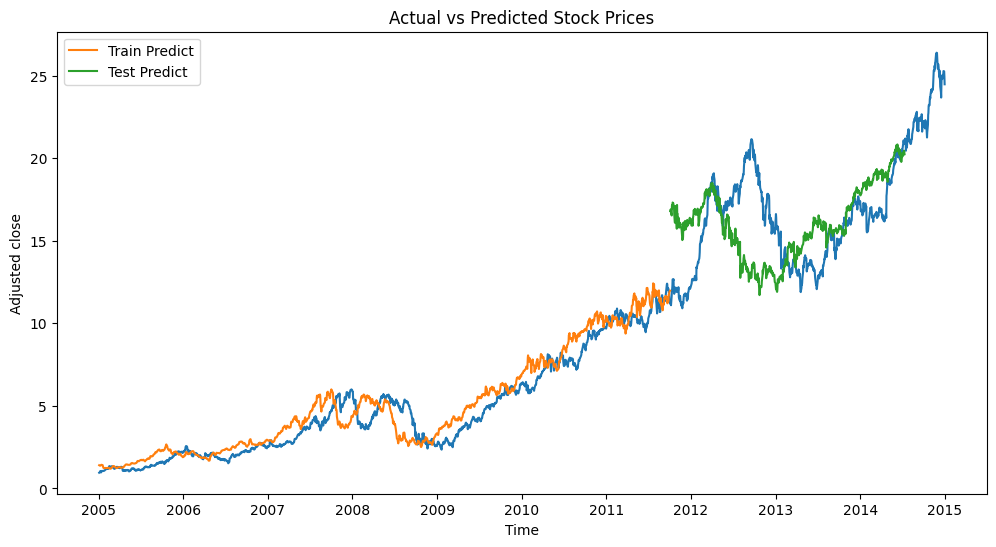

In [304]:
# Plot the output

plt.figure(figsize = (12,6))
plt.plot(a05["Date"], a05["Adj Close"])
plt.plot(a05["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(a05["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

### Tesing on 2015 - 2025

In [301]:
a15 = pd.read_csv("apple_2015.csv", header=[0,1,2]) # test

In [302]:
a15.columns = a15.columns.droplevel([1,2])
a15 = a15.rename(columns={'Price': 'Date'})
a15['Date'] = pd.to_datetime(a15['Date'])

In [303]:
a15.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

data_ajdc = a15[["Adj Close"]].values

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


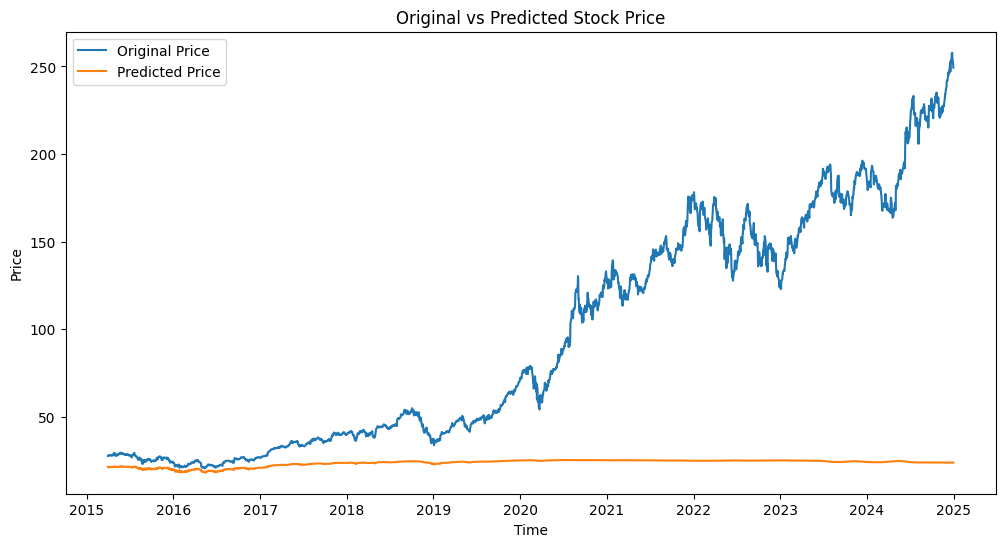

In [306]:
# Scale using pre-fitted scaler
scaled_data = scaler.transform(data_ajdc)

time_steps = 60
X_new = []
for i in range(time_steps, len(scaled_data)):
    X_new.append(scaled_data[i - time_steps:i])

X_new = np.array(X_new) 

# Reshape for LSTM: (samples, timesteps, features)
X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))

# Predict
predictions_scaled = model.predict(X_new)

# Inverse transform back to price scale
predictions_a15 = scaler.inverse_transform(predictions_scaled)

# True values to compare with
true_values = a15["Adj Close"].values[time_steps:]

dates = a15["Date"].values[time_steps:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, true_values, label="Original Price")
plt.plot(dates, predictions_a15, label="Predicted Price")
plt.title("Original vs Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Reusable function to fit multiple datasets

In [11]:
def stock_lstm(stock_name, file_path):

    print(f"\nProcessing: {stock_name}")

    # Load & preprocess
    data = pd.read_csv(file_path, header=[0,1,2])

    # Clean column names
    data.columns = data.columns.droplevel([1,2])
    data = data.rename(columns={'Price': 'Date'})
    data['Date'] = pd.to_datetime(data['Date'])

    # Keep only Adj Close
    data.drop(["Close", "High", "Low", "Open", "Volume"], axis=1, inplace=True)
    values = data[["Adj Close"]].values

    # Train/test split
    train_size  = int(len(values) * 0.8)
    train_data  = values[:train_size]
    test_data   = values[train_size:]

    # Scaling
    scaler = preprocessing.RobustScaler(
        with_centering=True,
        with_scaling=True,
        quantile_range=(25.0, 75.0)
    )
    scaler.fit(train_data)

    train_scaled = scaler.transform(train_data)
    test_scaled  = scaler.transform(test_data)

    # Xtrain ytrain xtest ytest
    def create_dataset(dataset, time_step=60):
        X, y = [], []
        for i in range(time_step, len(dataset)):
            X.append(dataset[i-time_step:i, 0])
            y.append(dataset[i, 0])
        return np.array(X), np.array(y)

    time_step = 60
    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test   = create_dataset(test_scaled, time_step)

    # Reshape for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        Input(shape=(60, 1)),
        LSTM(50, return_sequences=True),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(1)
    ])
    model.compile(loss="mean_squared_error", optimizer="adam")

    # Train
    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=64,
        verbose=1
    )

    # Predictions
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)

    # Inverse scale
    train_pred_inv = scaler.inverse_transform(train_pred)
    test_pred_inv  = scaler.inverse_transform(test_pred)
    y_train_inv    = scaler.inverse_transform(y_train.reshape(-1,1))
    y_test_inv     = scaler.inverse_transform(y_test.reshape(-1,1))

    # Performance metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_pred_inv))
    test_rmse  = np.sqrt(mean_squared_error(y_test_inv, test_pred_inv))

    train_mae  = mean_absolute_error(y_train_inv, train_pred_inv)
    test_mae   = mean_absolute_error(y_test_inv, test_pred_inv)

    train_mape = np.mean(np.abs((y_train_inv - train_pred_inv) / y_train_inv)) * 100
    test_mape  = np.mean(np.abs((y_test_inv  - test_pred_inv)  / y_test_inv))  * 100

    # Print metrics
    print(f"\n--- Performance for {stock_name} ---")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test  RMSE: {test_rmse:.4f}")
    print(f"Train MAE : {train_mae:.4f}")
    print(f"Test  MAE : {test_mae:.4f}")
    print(f"Train MAPE: {train_mape:.2f}%")
    print(f"Test  MAPE: {test_mape:.2f}%")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Adj Close"], label="Actual", color="black")
    plt.plot(
        data["Date"][:len(train_pred_inv)],
        train_pred_inv,
        label="Train Predict"
    )
    plt.plot(
        data["Date"][len(train_pred_inv):len(train_pred_inv) + len(test_pred_inv)],
        test_pred_inv,
        label="Test Predict"
    )
    plt.xlabel("Time")
    plt.ylabel("Adjusted Close")
    plt.title(f"{stock_name} — Actual vs Predicted Prices")
    plt.legend()
    plt.show()

    return {
    "model": model,
    "scaler": scaler,
    "train_rmse": train_rmse,
    "test_rmse": test_rmse,
    "train_mae": train_mae,
    "test_mae": test_mae,
    "train_mape": train_mape,
    "test_mape": test_mape
    }
 


Processing: Rightmove
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0670 - val_loss: 0.0274
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0188 - val_loss: 0.0226
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0147 - val_loss: 0.0195
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0127 - val_loss: 0.0183
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0112 - val_loss: 0.0154
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0102 - val_loss: 0.0133
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0092 - val_loss: 0.0117
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0088 - val_loss: 0.0110
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0085 - val_loss: 0.0098
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0073 - val_loss: 0.0091
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0075 - val_loss: 0.0093
Epoch 12/100
31/31 ━━━━━━━━━━

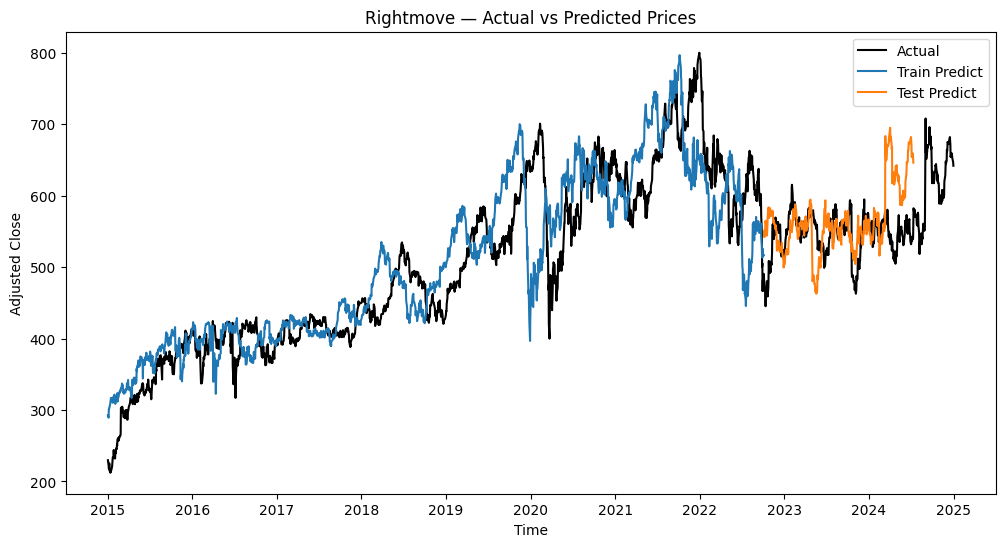


Processing: Experian
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0605 - val_loss: 0.0460
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0092 - val_loss: 0.0243
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0073 - val_loss: 0.0147
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0064 - val_loss: 0.0128
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0058 - val_loss: 0.0142
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0053 - val_loss: 0.0098
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0052 - val_loss: 0.0097
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0049 - val_loss: 0.0062
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 12/100
31/31 ━━━━━━━━━━━

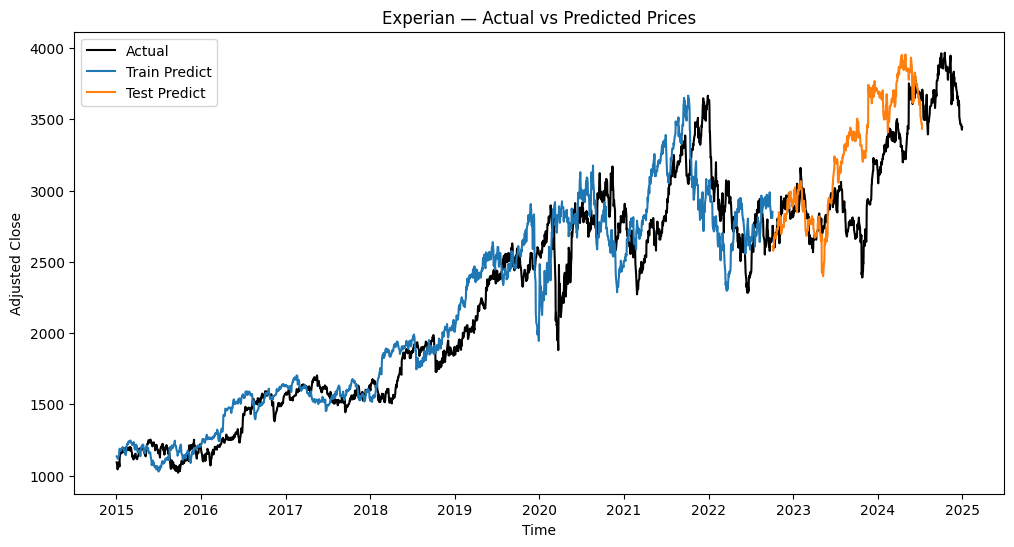

In [10]:
stocks = {
    "Rightmove": "rightmove_data.csv",
    "Experian": "experian_data.csv",
}

for name, path in stocks.items():
    stock_lstm(name, path)
